<a href="https://colab.research.google.com/github/saidElhachemy/eBay-Car-Sales/blob/main/eBay_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv("autos.csv", encoding = 'Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The dataset contains rows with null values, let's remove those lines<br>
20 columns, of which *price* and *odometer* should be float

In [21]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [76]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [77]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

* The *nrOfPictures* column has only zero values, we remove it <br>
* In the columns *seller* and *offerType*, the values "priva" and "Angebot" are the ones repeating in the whole dataset, so we remove them <br>
* The columns *price* and *odometer* should be float <br>
* The years in *yearOfRegistration* go from 1000 to 9999 which is not logical as cars weren't invented until 1800s and the maximum date in the *lastSeen* column is autos.lastSeen.max() = 2016-04-07 14:58:50. we will only keep dates from 1900 to 2016
* The *monthOfRegistration* column has a min value of 0 which is not possible
* There area lots of rows with NaN values, we remove those <br>

In [3]:
# * The *nrOfPictures* column has only zero values, we remove it <br>
# * In the columns *seller* and *offerType*, the values "priva" and "Angebot" are the ones repeating in the whole dataset, so we remove them
autos.drop('nrOfPictures',axis=1,inplace=True)
autos.drop('seller',axis=1,inplace=True)
autos.drop('offerType',axis=1,inplace=True)

In [4]:
# * The columns *price* and *odometer* should be float <br>
autos.price = autos.price.str.replace(',','').str.replace('$','').astype(int)
autos.odometer = autos.odometer.str.replace(',','').str.replace('km','').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [5]:
# * The years in *yearOfRegistration* go from 1000 to 9999 which is not logical as cars weren't invented until 1800s and the maximum date in the *lastSeen* column 
# is autos.lastSeen.max() = 2016-04-07 14:58:50. we will only keep dates from 1900 to 2016
autos = autos[(autos["yearOfRegistration"]>1900) & (autos["yearOfRegistration"] < 2016)]

In [6]:
# remove rows where month of reg is 0
auto = autos[autos.monthOfRegistration != 0]

In [7]:
# remove nan values
autos = autos.dropna()

In [90]:
autos.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [105]:
autos.describe(include='all')

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
count,35005,35005,3.500500e+04,35005,35005,35005.000000,35005,35005.000000,35005,35005.000000,35005.000000,35005,35005,35005,35005,35005.000000,35005
unique,34082,25805,NaN,2,8,NaN,2,NaN,242,NaN,NaN,7,39,2,67,NaN,28810
top,2016-03-16 21:50:53,Volkswagen_Golf_1.4,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,74,NaN,18058,10217,NaN,26934,NaN,2797,NaN,NaN,22604,7236,31165,1400,NaN,7
mean,NaN,NaN,7.399343e+03,NaN,NaN,2003.335781,NaN,127.353692,NaN,124308.813027,6.176032,NaN,NaN,NaN,NaN,51771.400200,NaN
std,NaN,NaN,8.950652e+04,NaN,NaN,6.446321,NaN,182.531873,NaN,39544.675136,3.471513,NaN,NaN,NaN,NaN,25809.943623,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,1931.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1.500000e+03,NaN,NaN,1999.000000,NaN,80.000000,NaN,100000.000000,3.000000,NaN,NaN,NaN,NaN,31191.000000,NaN
50%,NaN,NaN,3.800000e+03,NaN,NaN,2004.000000,NaN,116.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,51063.000000,NaN
75%,NaN,NaN,8.599000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,72760.000000,NaN


* the *price*  and *powerPS* columns have max values that are too far from their 75%. we should remove excessive values and 0 values (for price)

In [134]:
autos.price.value_counts().sort_index(ascending = True).head(10)

0     457
1      36
11      1
13      1
47      1
50     15
60      2
65      1
66      1
70      1
Name: price, dtype: int64

In [8]:
autos = autos[autos.price != 0]

In [137]:
autos.price.value_counts().sort_index(ascending = False).head(10)
# there is a big jump from 299000 to 999990, we remove the big values

12345678    1
11111111    1
999999      1
999990      1
299000      1
295000      1
259000      1
220000      1
198000      1
190000      1
Name: price, dtype: int64

In [9]:
autos = autos[autos.price < 300000]

In [144]:
autos.powerPS.value_counts().sort_index(ascending = False).head(20)
# the value jumped from 1055 to 1398

17700    1
16312    1
15001    1
7511     1
6226     1
6045     1
5867     1
4400     1
3750     1
2729     1
1998     1
1800     1
1796     1
1781     1
1780     1
1753     1
1405     1
1398     1
1055     1
1001     1
Name: powerPS, dtype: int64

In [10]:
autos = autos[autos.powerPS <= 1055]

In [146]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34526 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          34526 non-null  object
 1   name                 34526 non-null  object
 2   price                34526 non-null  int64 
 3   abtest               34526 non-null  object
 4   vehicleType          34526 non-null  object
 5   yearOfRegistration   34526 non-null  int64 
 6   gearbox              34526 non-null  object
 7   powerPS              34526 non-null  int64 
 8   model                34526 non-null  object
 9   odometer             34526 non-null  int64 
 10  monthOfRegistration  34526 non-null  int64 
 11  fuelType             34526 non-null  object
 12  brand                34526 non-null  object
 13  notRepairedDamage    34526 non-null  object
 14  dateCreated          34526 non-null  object
 15  postalCode           34526 non-null  int64 
 16  last

**Let's take a look at the different statistics**

In [147]:
autos.vehicleType.value_counts()

limousine     10084
kleinwagen     7835
kombi          7089
bus            3345
cabrio         2436
coupe          1910
suv            1612
andere          215
Name: vehicleType, dtype: int64

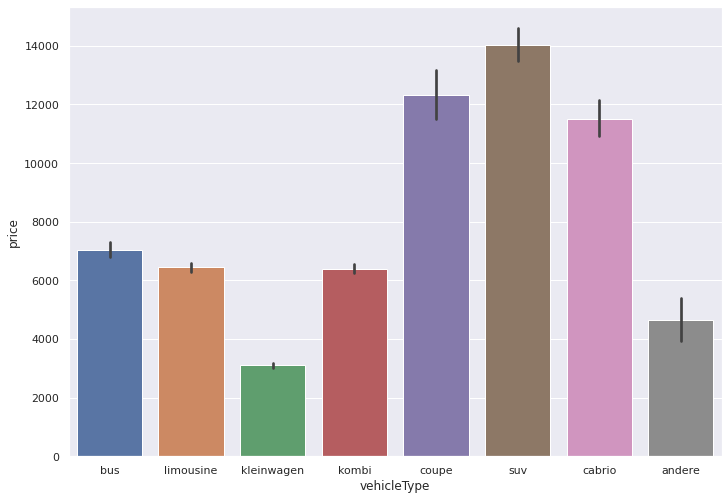

In [150]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=autos, x='vehicleType', y='price')
# the average prices for the different vehicle types
# suv has the highest, followed by coupe and then cabrio
# kleinwagen has the lowest

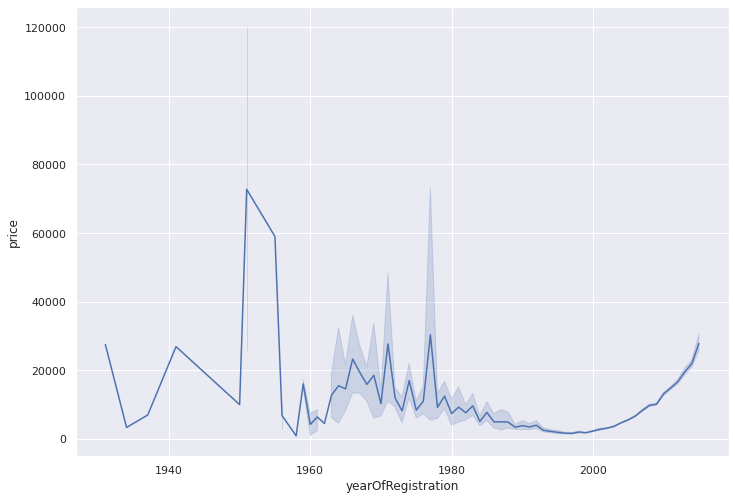

In [151]:
sns.lineplot(data=autos, x='yearOfRegistration', y='price')

In [162]:
autos.gearbox.value_counts()

manuell      26547
automatik     7979
Name: gearbox, dtype: int64

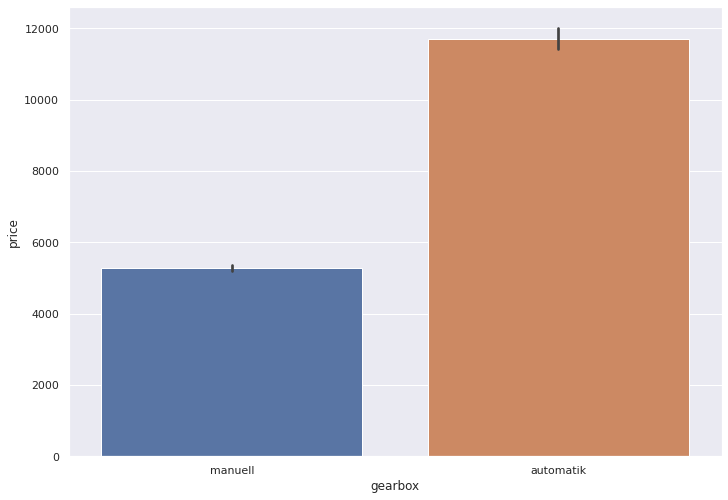

In [164]:
sns.barplot(data=autos, x='gearbox', y='price')
# automatic cars are pricier than manual cars, especially since the number of manual cars is around the triple of that of automatic ones

In [176]:
autos.brand.value_counts()

volkswagen       7119
bmw              4032
mercedes_benz    3552
opel             3525
audi             3160
ford             2316
renault          1550
peugeot          1035
fiat              820
seat              651
skoda             638
nissan            554
mazda             516
citroen           490
toyota            486
smart             437
hyundai           371
mini              364
volvo             347
mitsubishi        278
honda             269
kia               268
alfa_romeo        242
porsche           240
suzuki            221
chevrolet         200
chrysler          129
dacia             107
jeep               87
land_rover         82
daihatsu           78
subaru             71
saab               62
jaguar             58
daewoo             49
rover              40
lancia             33
trabant            30
lada               19
Name: brand, dtype: int64

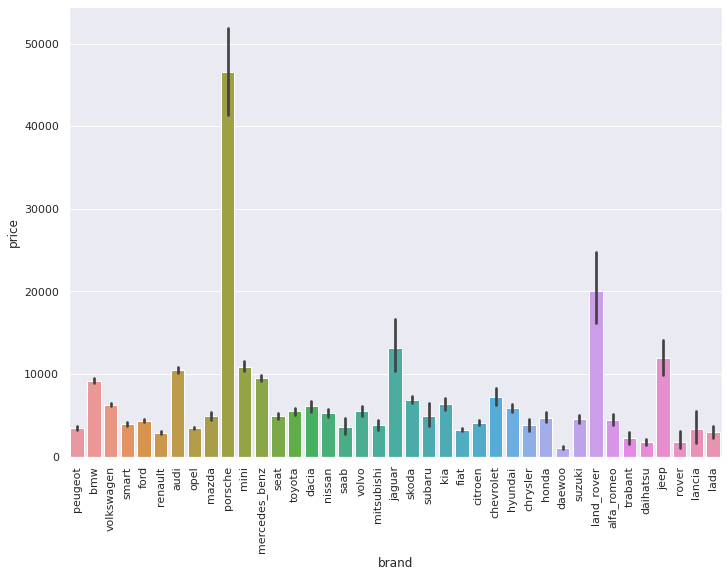

In [179]:
ax = sns.barplot(data=autos, x='brand', y='price')
ax.tick_params(axis='x', rotation=90)
# car brans impact the price, 
# porsche is the most expensive, followed by land rover
# jaguar and jeep are almost tied for third place
# the cheapest is daewoo, daihatsu and then rover

In [180]:
autos.odometer.value_counts()

150000    21267
125000     3898
100000     1622
90000      1374
80000      1165
70000       990
60000       963
50000       860
40000       675
30000       640
20000       603
5000        285
10000       184
Name: odometer, dtype: int64

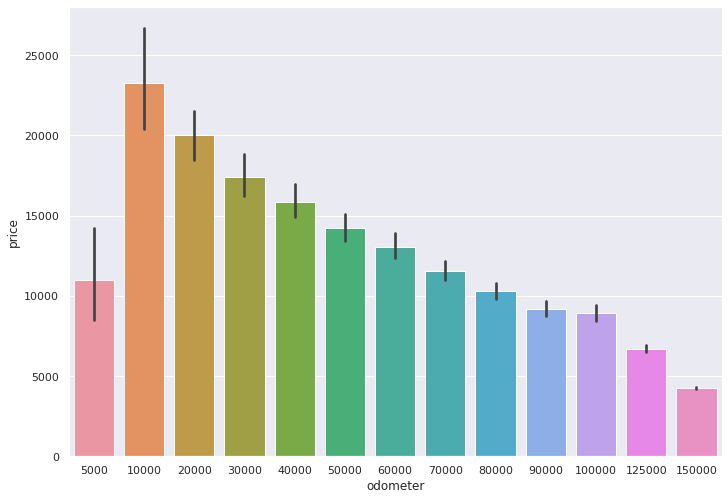

In [181]:
ax = sns.barplot(data=autos, x='odometer', y='price')
# as expected, the lower the milage the higher the price and vice versa, expect in the 5000 case, the price is low,

In [185]:
autos[autos.odometer == 5000].describe(include='all')
# the reason is because 50% of the cars have prices below 3550, 

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
count,285,285,285.000000,285,285,285.000000,285,285.000000,285,285.0,285.000000,285,285,285,285,285.000000,285
unique,285,277,NaN,2,8,NaN,2,NaN,103,NaN,NaN,5,35,2,32,NaN,285
top,2016-03-22 11:57:49,Volkswagen_Kaefer,NaN,test,kleinwagen,NaN,manuell,NaN,andere,NaN,NaN,benzin,volkswagen,nein,2016-03-24 00:00:00,NaN,2016-04-02 01:47:21
freq,1,4,NaN,153,84,NaN,225,NaN,33,NaN,NaN,223,58,235,15,NaN,1
mean,NaN,NaN,10969.821053,NaN,NaN,2001.736842,NaN,113.256140,NaN,5000.0,5.701754,NaN,NaN,NaN,NaN,45332.494737,NaN
std,NaN,NaN,23907.636444,NaN,NaN,13.271709,NaN,80.842881,NaN,0.0,3.801246,NaN,NaN,NaN,NaN,25832.279922,NaN
min,NaN,NaN,1.000000,NaN,NaN,1934.000000,NaN,0.000000,NaN,5000.0,0.000000,NaN,NaN,NaN,NaN,1069.000000,NaN
25%,NaN,NaN,1250.000000,NaN,NaN,1998.000000,NaN,60.000000,NaN,5000.0,3.000000,NaN,NaN,NaN,NaN,24109.000000,NaN
50%,NaN,NaN,3550.000000,NaN,NaN,2002.000000,NaN,105.000000,NaN,5000.0,6.000000,NaN,NaN,NaN,NaN,44623.000000,NaN
75%,NaN,NaN,13000.000000,NaN,NaN,2014.000000,NaN,150.000000,NaN,5000.0,9.000000,NaN,NaN,NaN,NaN,66287.000000,NaN


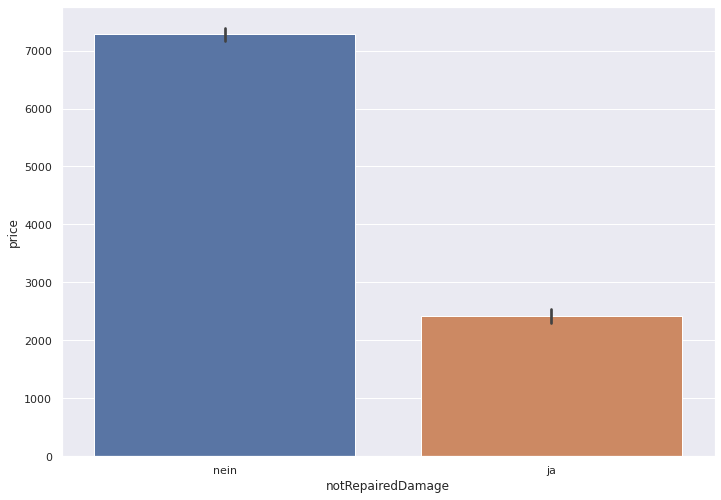

In [190]:
ax = sns.barplot(data=autos, x='notRepairedDamage', y='price')
# non damaged cars are more expensive than damaged ones

In [11]:
autos.fuelType.value_counts()

benzin     22242
diesel     11680
lpg          505
cng           57
hybrid        26
elektro        9
andere         7
Name: fuelType, dtype: int64

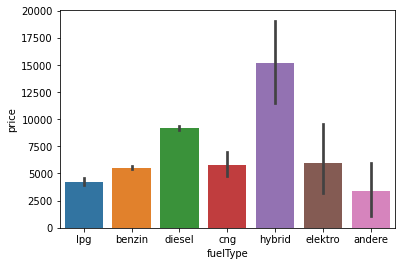

In [12]:
ax = sns.barplot(data=autos, x='fuelType', y='price')
# benzin based cars are cheaper than the other as they compose more than 50% of the cars

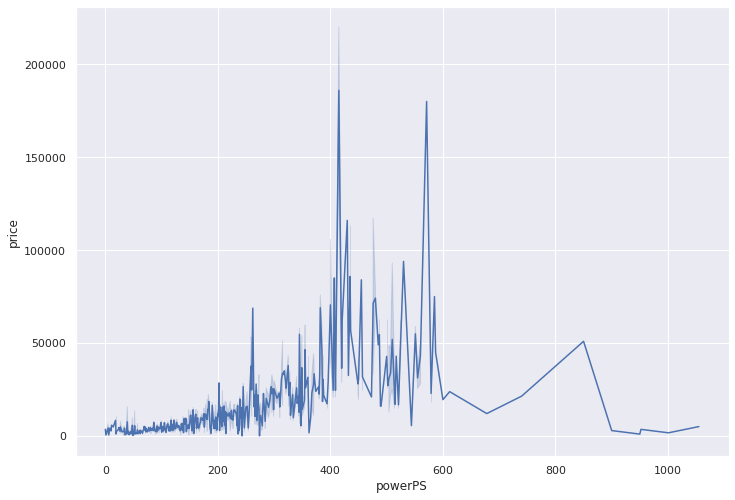

In [52]:
ax = sns.lineplot(data=autos, x='powerPS', y='price')

**Now let's look for the best deals**

In [14]:
# here we check the benzin (petrol) cars
autos[autos.fuelType == "benzin"].describe(include='all')

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
count,22242,22242,22242.000000,22242,22242,22242.000000,22242,22242.000000,22242,22242.000000,22242.000000,22242,22242,22242,22242,22242.000000,22242
unique,21849,16290,NaN,2,8,NaN,2,NaN,234,NaN,NaN,1,39,2,63,NaN,19448
top,2016-03-29 23:42:13,BMW_316i,NaN,test,kleinwagen,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-06 21:17:51
freq,3,73,NaN,11529,7020,NaN,18276,NaN,1943,NaN,NaN,22242,4181,19693,908,NaN,6
mean,NaN,NaN,5539.000180,NaN,NaN,2001.970956,NaN,116.995279,NaN,120776.908551,6.047163,NaN,NaN,NaN,NaN,51631.405449,NaN
std,NaN,NaN,9344.778208,NaN,NaN,6.744368,NaN,71.519422,NaN,40877.104638,3.446388,NaN,NaN,NaN,NaN,25868.702233,NaN
min,NaN,NaN,1.000000,NaN,NaN,1931.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1200.000000,NaN,NaN,1998.000000,NaN,75.000000,NaN,90000.000000,3.000000,NaN,NaN,NaN,NaN,31135.000000,NaN
50%,NaN,NaN,2750.000000,NaN,NaN,2002.000000,NaN,102.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,50969.000000,NaN
75%,NaN,NaN,6596.750000,NaN,NaN,2007.000000,NaN,145.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,72510.000000,NaN


In [38]:
autos[autos.fuelType == "benzin"][autos[autos.fuelType == "benzin"].price < 6600].describe()
# here we have three intervals of prices
# 1 - 6600
# 6600 - 20000
# 20000 - 299000

,price,yearOfRegistration,powerPS,odometer,monthOfRegistration,postalCode
count,16683.000000,16683.000000,16683.000000,16683.000000,16683.000000,16683.000000
mean,2305.364563,2000.347180,97.918660,132494.455434,6.009830,50710.606845
std,1677.334833,5.201878,50.441687,31461.967949,3.503063,25807.199337
min,1.000000,1934.000000,0.000000,5000.000000,0.000000,1069.000000
25%,950.000000,1998.000000,64.000000,125000.000000,3.000000,30449.000000
50%,1800.000000,2000.000000,90.000000,150000.000000,6.000000,49525.000000
75%,3450.000000,2004.000000,122.000000,150000.000000,9.000000,71258.500000
max,6599.000000,2015.000000,1055.000000,150000.000000,12.000000,99988.000000


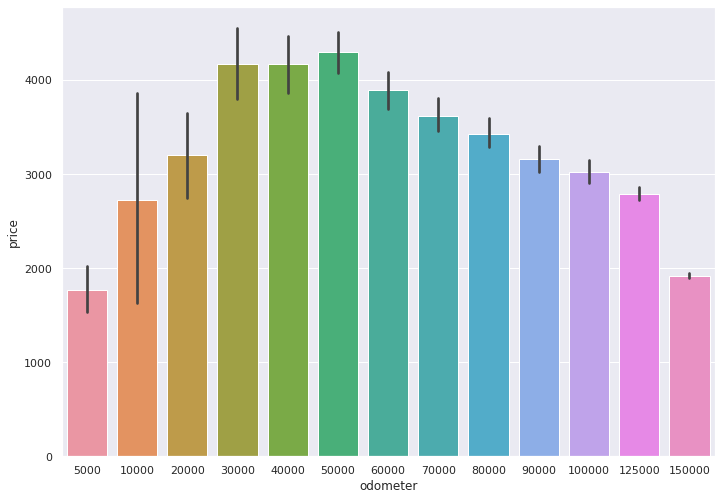

In [59]:
# for 1 - 6600
autos6600 = autos[autos.fuelType == "benzin"][autos[autos.fuelType == "benzin"].price < 6600]
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=autos6600, x='odometer', y='price')

In [44]:
# we pic cars with odometer of 5000km
autos6600[autos6600.odometer <= 5000].describe(include='all')

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
count,130,130,130.000000,130,130,130.000000,130,130.000000,130,130.0,130.000000,130,130,130,130,130.000000,130
unique,130,125,NaN,2,7,NaN,2,NaN,55,NaN,NaN,1,23,2,30,NaN,130
top,2016-03-22 11:57:49,Mercedes_E_240_T_Avantgarde__TÜF_neu,NaN,test,kleinwagen,NaN,manuell,NaN,golf,NaN,NaN,benzin,opel,nein,2016-03-24 00:00:00,NaN,2016-04-02 01:47:21
freq,1,3,NaN,73,49,NaN,113,NaN,11,NaN,NaN,130,26,94,10,NaN,1
mean,NaN,NaN,1768.092308,NaN,NaN,1996.846154,NaN,79.800000,NaN,5000.0,4.969231,NaN,NaN,NaN,NaN,40872.969231,NaN
std,NaN,NaN,1521.413141,NaN,NaN,10.240111,NaN,54.205523,NaN,0.0,3.909715,NaN,NaN,NaN,NaN,24726.817453,NaN
min,NaN,NaN,1.000000,NaN,NaN,1934.000000,NaN,0.000000,NaN,5000.0,0.000000,NaN,NaN,NaN,NaN,4159.000000,NaN
25%,NaN,NaN,600.000000,NaN,NaN,1996.000000,NaN,50.000000,NaN,5000.0,1.000000,NaN,NaN,NaN,NaN,21778.750000,NaN
50%,NaN,NaN,1300.000000,NaN,NaN,1999.000000,NaN,75.000000,NaN,5000.0,5.000000,NaN,NaN,NaN,NaN,34714.000000,NaN
75%,NaN,NaN,2737.500000,NaN,NaN,2001.000000,NaN,115.000000,NaN,5000.0,8.000000,NaN,NaN,NaN,NaN,63403.250000,NaN


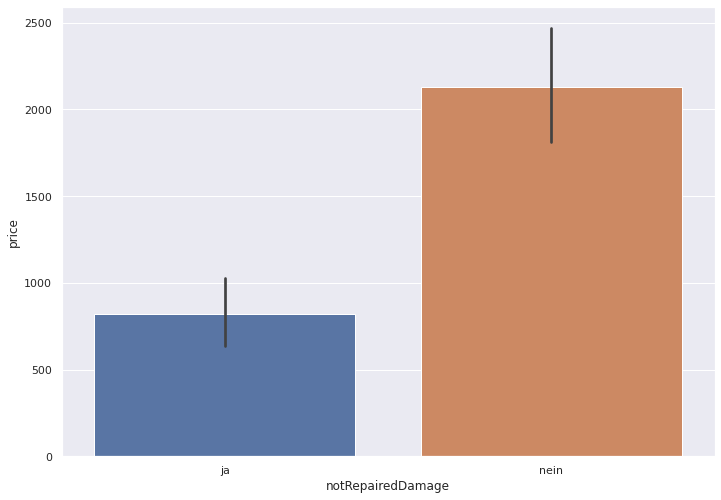

In [45]:
ax = sns.barplot(data=autos6600[autos6600.odometer <= 5000], x='notRepairedDamage', y='price')
# let's find a car that is not previously damaged

In [61]:
autos6600_odometer5000 = autos6600[autos6600.odometer <= 5000]
autos6600_odometer5000_noDamage = autos6600_odometer5000[autos6600_odometer5000.notRepairedDamage == "nein"]
autos6600_odometer5000_noDamage.describe()

,price,yearOfRegistration,powerPS,odometer,monthOfRegistration,postalCode
count,94.000000,94.000000,94.000000,94.0,94.000000,94.000000
mean,2130.872340,1997.797872,86.393617,5000.0,5.478723,41532.829787
std,1602.241624,8.170995,53.297545,0.0,3.917781,24783.048319
min,1.000000,1966.000000,0.000000,5000.0,0.000000,4275.000000
25%,800.000000,1997.000000,54.250000,5000.0,2.000000,22651.750000
50%,1799.500000,1999.000000,75.000000,5000.0,5.000000,37215.500000
75%,2967.500000,2001.750000,116.000000,5000.0,8.000000,63403.250000
max,6300.000000,2015.000000,200.000000,5000.0,12.000000,99189.000000


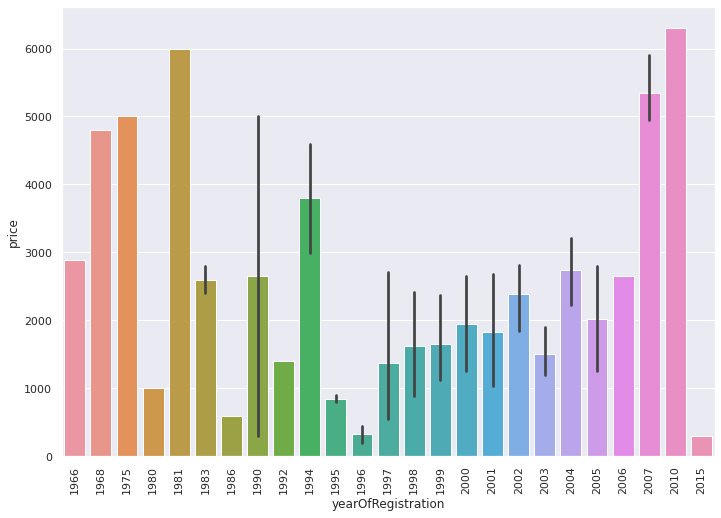

In [62]:
ax = sns.barplot(data=autos6600_odometer5000_noDamage, x='yearOfRegistration', y='price')
ax.tick_params(axis='x', rotation=90)
# it is best to get a car that is not old, the best deal would be a car from 2000 to 2015

In [64]:
autos6600_odometer5000_noDamage[autos6600_odometer5000_noDamage.yearOfRegistration > 2000].describe()

,price,yearOfRegistration,powerPS,odometer,monthOfRegistration,postalCode
count,35.000000,35.000000,35.00000,35.0,35.000000,35.000000
mean,2497.114286,2003.485714,81.20000,5000.0,5.971429,36406.571429
std,1555.278598,3.003639,50.45254,0.0,3.800044,23721.742603
min,1.000000,2001.000000,0.00000,5000.0,0.000000,7333.000000
25%,1375.000000,2001.000000,58.00000,5000.0,3.000000,14854.000000
50%,2550.000000,2003.000000,75.00000,5000.0,6.000000,30655.000000
75%,2999.500000,2004.000000,109.00000,5000.0,9.000000,46886.500000
max,6300.000000,2015.000000,200.00000,5000.0,12.000000,90451.000000


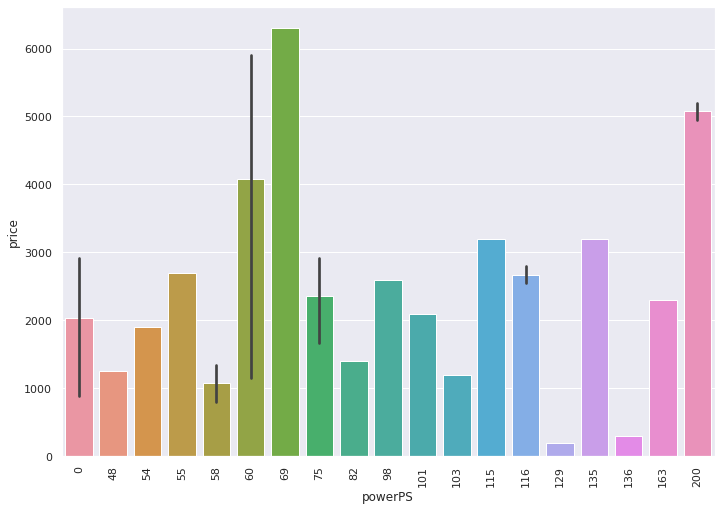

In [65]:
autos6600_odometer5000_noDamage_2000 = autos6600_odometer5000_noDamage[autos6600_odometer5000_noDamage.yearOfRegistration > 2000]
ax = sns.barplot(data=autos6600_odometer5000_noDamage_2000, x='powerPS', y='price')
ax.tick_params(axis='x', rotation=90)
# a good car would have a horse power of 100 or more

In [67]:
autos6600_odometer5000_noDamage_2000[autos6600_odometer5000_noDamage_2000.powerPS > 100].describe(include='all')

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
count,12,12,12.000000,12,12,12.000000,12,12.000000,12,12.0,12.000000,12,12,12,12,12.000000,12
unique,12,11,NaN,2,6,NaN,2,NaN,10,NaN,NaN,1,9,1,9,NaN,12
top,2016-03-24 17:42:27,Passat_2.0_turbo,NaN,control,limousine,NaN,manuell,NaN,almera,NaN,NaN,benzin,opel,nein,2016-03-24 00:00:00,NaN,2016-04-06 03:44:26
freq,1,2,NaN,6,3,NaN,11,NaN,2,NaN,NaN,12,2,12,3,NaN,1
mean,NaN,NaN,2508.250000,NaN,NaN,2004.583333,NaN,134.583333,NaN,5000.0,6.333333,NaN,NaN,NaN,NaN,39884.500000,NaN
std,NaN,NaN,1553.377091,NaN,NaN,3.848455,NaN,35.325650,NaN,0.0,3.143054,NaN,NaN,NaN,NaN,25860.307217,NaN
min,NaN,NaN,200.000000,NaN,NaN,2001.000000,NaN,101.000000,NaN,5000.0,3.000000,NaN,NaN,NaN,NaN,10317.000000,NaN
25%,NaN,NaN,1875.000000,NaN,NaN,2002.000000,NaN,112.000000,NaN,5000.0,3.750000,NaN,NaN,NaN,NaN,19113.000000,NaN
50%,NaN,NaN,2425.000000,NaN,NaN,2004.000000,NaN,122.500000,NaN,5000.0,5.500000,NaN,NaN,NaN,NaN,35859.000000,NaN
75%,NaN,NaN,3199.250000,NaN,NaN,2005.500000,NaN,142.750000,NaN,5000.0,9.000000,NaN,NaN,NaN,NaN,66021.500000,NaN


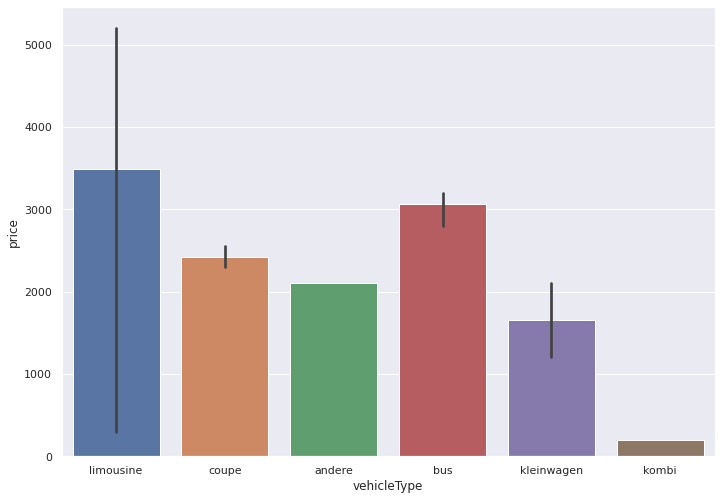

In [68]:
autos6600_odometer5000_noDamage_2000_HP100 = autos6600_odometer5000_noDamage_2000[autos6600_odometer5000_noDamage_2000.powerPS > 100]
ax = sns.barplot(data=autos6600_odometer5000_noDamage_2000_HP100, x='vehicleType', y='price')

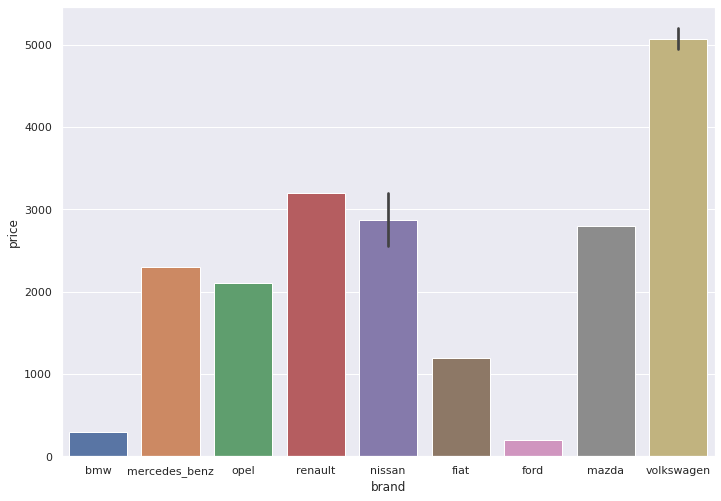

In [69]:
ax = sns.barplot(data=autos6600_odometer5000_noDamage_2000_HP100, x='brand', y='price')

**here the vehicle type and brand depends on the buyer's preferences**